<h1 style="color: blue; text-align: center; font-size: 30px;"><b>Dimensionality Reduction and Principal Component Analysis (PCA)</b></h1>


**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to reduce the number of features (variables) in a dataset while preserving as much variability as possible. It works by transforming the original features into a new set of uncorrelated variables called **principal components**, ordered by the amount of variance they capture.

---

## Steps in PCA

1. **Standardize the Data**:
   - Ensure all features have a mean of 0 and standard deviation of 1.

2. **Covariance Matrix**:
   - Compute the covariance matrix to understand relationships between features.

3. **Eigenvalues and Eigenvectors**:
   - Derive eigenvalues (variance explained) and eigenvectors (directions) from the covariance matrix.

4. **Select Principal Components**:
   - Choose the top components based on eigenvalues to retain most of the variance.

5. **Transform the Data**:
   - Project the data onto the selected principal components.

---

## Benefits of PCA

- **Reduces computational complexity**.
- **Removes multicollinearity** between features.
- **Helps visualize high-dimensional data** in 2D or 3D.

---

# Feature Selection

**Feature Selection** is the process of selecting the most relevant features (variables) from the dataset that contribute the most to the predictive power of a model. Unlike PCA, feature selection does not create new features; it simply reduces the dataset to the most important existing features.

### Common Feature Selection Techniques

1. **Filter Methods**:
   - Use statistical measures like correlation, mutual information, or chi-square tests to rank and select features.
   - Example: Removing features with low variance or high correlation.

2. **Wrapper Methods**:
   - Use iterative approaches like Recursive Feature Elimination (RFE) to select features that optimize model performance.
   - Example: Testing subsets of features with a specific algorithm.

3. **Embedded Methods**:
   - Perform feature selection during the model training process.
   - Example: Using regularization techniques like Lasso (L1 regularization) or Tree-based feature importance.

### Benefits of Feature Selection

- Reduces overfitting by eliminating irrelevant or redundant features.
- Improves model interpretability by focusing on key features.
- Speeds up training and inference by reducing the feature space.

---

## Difference Between PCA and Feature Selection

| **Aspect**                | **PCA**                                                | **Feature Selection**                                      |
|---------------------------|--------------------------------------------------------|-----------------------------------------------------------|
| **Purpose**               | Reduces dimensionality by creating new features (principal components). | Selects the most relevant existing features.              |
| **Feature Relationship**  | Creates uncorrelated principal components.             | Retains original features and relationships.              |
| **Interpretability**      | Principal components are linear combinations of original features, making them less interpretable. | Original features remain intact, so they are more interpretable. |
| **Focus**                 | Focuses on preserving variance in the data.            | Focuses on relevance of features for the target variable. |
| **Techniques Used**       | Uses covariance matrix, eigenvalues, and eigenvectors. | Techniques include filter methods (e.g., correlation), wrapper methods (e.g., RFE), and embedded methods (e.g., Lasso). |
| **Target Variable**       | Does not consider the target variable (unsupervised).  | Can consider the target variable (supervised).            |

---

## When to Use PCA vs. Feature Selection

- Use **PCA** when:
  - You have a large number of features and want to reduce dimensionality while preserving variance.
  - Features are highly correlated, causing multicollinearity issues.
  - Interpretability is less critical.

- Use **Feature Selection** when:
  - You want to retain specific features that are most relevant to the target variable.
  - Interpretability of the model is important.
  - The dataset has a mix of relevant and irrelevant features.

---


<b>Principal Component Analysis (PCA) </b> is a dimensionality reduction technique used to reduce the number of features (variables) in a dataset while preserving as much variability as possible. It works by transforming the original features into a new set of uncorrelated variables called <b>principal components</b>, ordered by the amount of variance they capture.

---

## Steps in PCA

1. **Standardize the Data**:
   - Ensure all features have a mean of 0 and standard deviation of 1.

2. **Covariance Matrix**:
   - Compute the covariance matrix to understand relationships between features.

3. **Eigenvalues and Eigenvectors**:
   - Derive eigenvalues (variance explained) and eigenvectors (directions) from the covariance matrix.

4. **Select Principal Components**:
   - Choose the top components based on eigenvalues to retain most of the variance.

5. **Transform the Data**:
   - Project the data onto the selected principal components.

---

## Benefits of PCA

- **Reduces computational complexity**.
- **Removes multicollinearity** between features.
- **Helps visualize high-dimensional data** in 2D or 3D.

---

## Difference Between PCA and Feature Selection

| **Aspect**                | **PCA**                                                | **Feature Selection**                                      |
|---------------------------|--------------------------------------------------------|-----------------------------------------------------------|
| **Purpose**               | Reduces dimensionality by creating new features (principal components). | Selects the most relevant existing features.              |
| **Feature Relationship**  | Creates uncorrelated principal components.             | Retains original features and relationships.              |
| **Interpretability**      | Principal components are linear combinations of original features, making them less interpretable. | Original features remain intact, so they are more interpretable. |
| **Focus**                 | Focuses on preserving variance in the data.            | Focuses on relevance of features for the target variable. |
| **Techniques Used**       | Uses covariance matrix, eigenvalues, and eigenvectors. | Techniques include filter methods (e.g., correlation), wrapper methods (e.g., RFE), and embedded methods (e.g., Lasso). |
| **Target Variable**       | Does not consider the target variable (unsupervised).  | Can consider the target variable (supervised).            |

---

## When to Use PCA vs. Feature Selection

- Use **PCA** when:
  - You have a large number of features and want to reduce dimensionality while preserving variance.
  - Features are highly correlated, causing multicollinearity issues.
  - Interpretability is less critical.

- Use **Feature Selection** when:
  - You want to retain specific features that are most relevant to the target variable.
  - Interpretability of the model is important.
  - The dataset has a mix of relevant and irrelevant features.

---



<font color=green size=4>We'll use the famous Iris dataset, which has 4 features: sepal length, sepal width, petal length, and petal width.

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [21]:
iris=load_iris()
data=iris.data
target=iris.target

In [23]:
target_names = iris.target_names
columns = iris.feature_names

In [37]:
#creating dataframe
df = pd.DataFrame(data, columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#Step 1 Standardising the data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)


In [29]:
#Step 2 Applying PCA
pca=PCA(n_components=2)# Reduce to 2 dimensions
principal_components=pca.fit_transform(data_scaled)

In [35]:
#Step 3 Create Dataframe for principal components
pca_df=pd.DataFrame(data=principal_components,columns=['PC1', 'PC2'])
pca_df['Target']=target
pca_df.head(3)

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


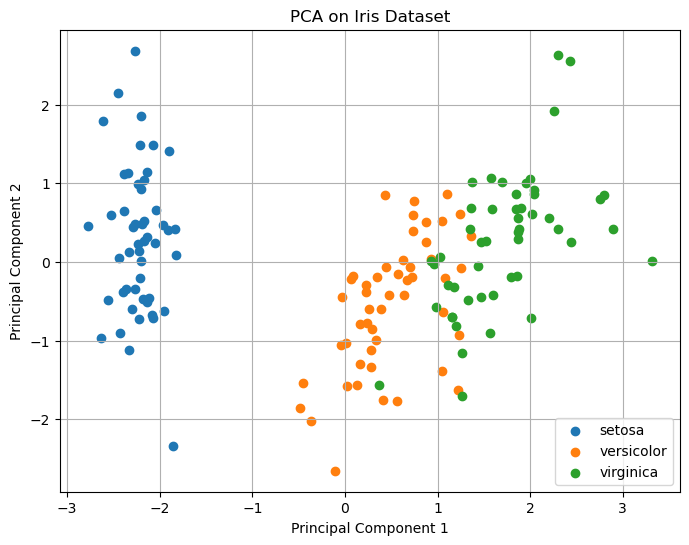

In [41]:
#Visualisation 
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(pca_df[pca_df['Target'] == i]['PC1'],
                pca_df[pca_df['Target'] == i]['PC2'],
                label=target_name)

plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [43]:
# Step 5: Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72962445 0.22850762]


#### Plot a cumulative explained variance ratio to decide the optimal number of components:



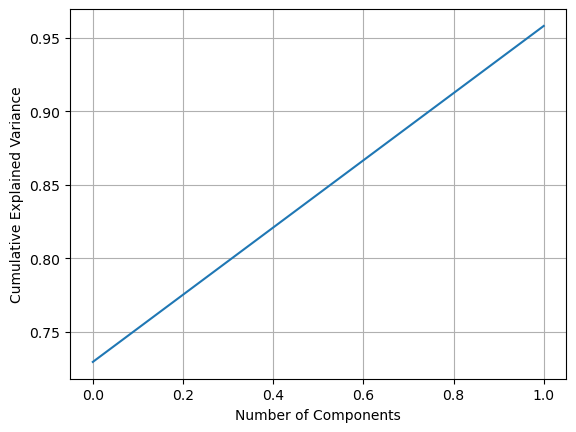

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
